In [1]:
'''
(a) Data Processing (4 points)
'''
import pandas as pd

'''
1. Download and read the data. For Python, you may use pandas library and use read csv
function.
'''
train_data = pd.read_csv('data_train.csv')
test_data = pd.read_csv('data_test.csv')

'''
2. Print the first 5 rows of the data using the command. (You may use head() function in
pandas library). Print the shape of the training dataframe. Write a short description of
the data.
'''

print("This is the head of the training data")
print(train_data.head())
print("This is the shape of the training data")
print(train_data.shape)

# The target variable is PT08.S1(C0) and there are 11 features in the data set, in the training data the data freame has 13 columns, where 12 columns are the features and the last column just assigns a number to the row.
# There are 6250 rows of data.
#missing values

'''
Does the data have any missing values? How many are missing? Return the number of
missing values. (In pandas, check out isnul() and isnul().sum())
'''

print("train data missing values")
print(train_data.isnull().sum())
train_data = train_data.dropna()
print("train data missing values after dropping")
print(train_data.isnull().sum())
## each of the columns in the features have 77 missing values


print("test data missing values")
print(test_data.isnull().sum())
test_data = test_data.dropna()
print("test data missing values after dropping")
print(test_data.isnull().sum())



This is the head of the training data
   Unnamed: 0  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0           0        797.0    -200.0       2.1          593.0    146.0   
1           1       1282.0    -200.0      11.0         1013.0    354.0   
2           2        891.0    -200.0       7.6          882.0    342.0   
3           3       1285.0    -200.0      18.1         1243.0    481.0   
4           4        892.0    -200.0       7.3          869.0     71.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1212.0     72.0         984.0        494.0  10.8  49.7  0.6429  
1         545.0    141.0        1384.0       1287.0  17.4  50.6  0.9989  
2         885.0    149.0         950.0        894.0   7.8  33.9  0.3594  
3         599.0    173.0        1815.0       1582.0  26.4  41.9  1.4237  
4         953.0     77.0        1363.0        632.0  37.4  14.7  0.9295  
This is the shape of the training data
(6250, 13)
train data missing valu

In [2]:
'''
Extract the features and the label. The label is PT08.S1(CO)
(I extract this later when I seperate the data into X and y)
'''
X = train_data
print(X.head())
print("--------------------")
#print(label.head())



   Unnamed: 0  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0           0        797.0    -200.0       2.1          593.0    146.0   
1           1       1282.0    -200.0      11.0         1013.0    354.0   
2           2        891.0    -200.0       7.6          882.0    342.0   
3           3       1285.0    -200.0      18.1         1243.0    481.0   
4           4        892.0    -200.0       7.3          869.0     71.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1212.0     72.0         984.0        494.0  10.8  49.7  0.6429  
1         545.0    141.0        1384.0       1287.0  17.4  50.6  0.9989  
2         885.0    149.0         950.0        894.0   7.8  33.9  0.3594  
3         599.0    173.0        1815.0       1582.0  26.4  41.9  1.4237  
4         953.0     77.0        1363.0        632.0  37.4  14.7  0.9295  
--------------------


In [3]:
'''
(b) Exploratory Data Analysis (10 points)
'''
'''
Plot the histograms of all the features in the data. Do all the features have a normal
distribution? Do you see any outlier values? Do you need to apply any normalization
technique to these values? If so, you can transform your data in this step and explain
your thought process in the corresponding markdown cell
'''
## plot histgrams for all the features
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from LinearRegression import LinearRegression
linear_model = LinearRegression()

## drop first column "Unamed: 0"
if 'Unnamed: 0' in X.columns:
    X = X.drop('Unnamed: 0', axis=1)
print("features before normalizing")
X.hist(bins=50, figsize=(20,15)) ## bins is the number of bins to use in the histogram

# clean by removing outliers greater than 3 standard deviations from the mean
X_clean = linear_model.clean(X)
## Getting rid  of some outliers 
X_clean.hist(bins=50, figsize=(20,15))
plt.show()


'''
Pick 2 features and create a scatter plot to illustrate the correlation between these two
features. Is there a high correlation between these features?
'''
print("Scatter plot between PT08.S2(NMHC) and PT08.S4(NO2)")
plt.scatter(X_clean['PT08.S2(NMHC)'], X_clean['PT08.S4(NO2)'])
plt.xlabel('PT08.S2(NMHC)')
plt.ylabel('PT08.S4(NO2)')
plt.title('Scatter plot between PT08.S2(NMHC) and PT08.S4(NO2)')
plt.show()

print("there seems to be a very high correlation between the two features")
X_clean.head()


'''
Compute the Pearson’s correlation between all pairs of variables 1-12. Assign the resulting
correlation values in a 12x12 matrix C, whose (i; j) element represents the correlation value
between variables i and j, i.e., C(i; j) = corr(i; j). Visualize the resulting matrix C with a
heatmap and discuss potential associations between the considered variables. Note: You
can use the ‘heatmap’ function from ‘seaborn’
'''
from pandas.plotting import scatter_matrix
scatter_matrix(X_clean, figsize=(20,15))
plt.show()

import seaborn as sns
corr = X_clean.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

features before normalizing


In [4]:
'''
(c) (20 points) Linear Regression Implementation Implement a linear regression model
from scratch to regress the target variable, Carbon monoxide (CO). (Remember: You can not
use any libraries for the linear regression model.)
'''


## Dropping the target variable from the test data
X_clean, y_clean = linear_model.drop_target(X_clean, 'PT08.S1(CO)')
x_clean_scaled= linear_model.scale(X_clean)


linear_model.fit(x_clean_scaled, y_clean)
y_train_predicted = linear_model.predict(x_clean_scaled)
r2 = linear_model.r2_score(y_clean, y_train_predicted)
r2

np.float64(0.8519751747888675)

In [5]:
'''
(d)
Logistic Regression Implementation Using the column PT08.S1(CO),
create a binary label for this dataset where the values more than 1000 correspond to label 1
and the values less than or equal to 1000 correspond to label 0. Implement a logistic regression
model from scratch to predict this binary label. (Remember: You can not use any libraries
for the logistic regression model.)
'''
import LogisticRegression as lr
y_clean_log = np.where(y_clean <= 1000, 0, 1)
# y_clean_test_log = np.where(y_test_clean <= 1000, 0, 1)
print(y_clean_log[0:5])
print(y_clean[0:5])

logistic_model = lr.LogisticRegression()
logistic_model.fit(x_clean_scaled, y_clean_log)
y_predicted_test_log = logistic_model.predict(x_clean_scaled)

if y_clean is not np.ndarray:
    y_clean = y_clean.to_numpy()


[0 1 0 1 0]
0     797.0
1    1282.0
2     891.0
3    1285.0
4     892.0
Name: PT08.S1(CO), dtype: float64


In [6]:
'''
(e) (10 points) Result Analysis - Linear Regression Perform a 5-fold cross validation.
Compute RMSE for each validation set across 5 folds. Report average and standard deviation
of RMSE values. Do you see a big change across different folds? How can you use the coefficient
of this model to find the most informative features?
(f ) (10 points) Result Analysis - Logistic Regression Perform a 5-fold cross validation.
Compute accuracy, precision, recall, and F1 score for each validation set across 5 folds. Report
the average and standard deviation of these metrics. Do you see a big change across different
folds?
'''
import ResultAnalysis as ra

# Linear Regression 5-cross validation
print("------------------------------------")
print("Linear Regression 5-cross validation")
feature_ranking = ra.k_fold_cross_validation_RMSE(x_clean_scaled, y_clean, 5)
print("------------------------------------")
# Logistic Regression 5-cross validation
print("Logistic Regression 5-cross validation") 
ra.k_fold_cross_validation(x_clean_scaled, y_clean_log, 5)
print("------------------------------------")

print("LinearRegression questions")
print("There is no significant change in RMSE between folds, the variation is modest, which suggests that the model is stable and performs similarly across different subsets of the data. ")
print("Features with larger coefficients in absolute value are more important for determining the output, positive weights indicate that an increase in the future leads to an increase in predicted value, while negative weights mean that an increase in the feature leads to a decrease in the predicted value.")


print("LogisticRegression questions")
print("The changes across the different folds are small for all metrics (accuracy, precision, recall, and F1 score), as indicated by the low standard deviations. This suggests that the Logistic Regression model performs consistently across the different data splits.")


------------------------------------
Linear Regression 5-cross validation
Weights: [ 22.11636028  29.1593216   18.85813797  10.74101607 -46.00308589
  15.60324648  26.13956774  46.14825328  -2.33230212  19.02752888
  -2.2632205 ], Bias: 1078.5469488603928
RMSE: 68.9548
Weights: [ 23.39376311  28.60022843  19.22224523  12.66122827 -48.80320713
  14.89713608  27.77951087  43.44372818  -2.01278418  19.52091395
  -2.70900843], Bias: 1078.18704488706
RMSE: 73.4406
Weights: [ 22.64143666  27.87986804  18.60444018  13.05470395 -45.09294757
  16.84378567  29.20082157  44.92634125  -2.58152469  19.06277699
  -2.43312882], Bias: 1078.8782939016362
RMSE: 67.5344
Weights: [ 22.07643229  28.26913415  18.9321724   12.12787513 -48.46496
  13.49911678  28.53115085  44.59979427  -3.07663526  18.48851174
  -4.67185607], Bias: 1078.870260228125
RMSE: 66.7260
Weights: [ 23.35632513  26.20059783  20.11150857  13.12249336 -45.88997253
  17.03821875  30.32513488  42.15667251  -3.14797775  18.65450469
  -2.16

-------------------------------------------------
Cross validation results for sklearn logistic regression
Accuracy:  [0.91183575 0.90568319 0.91414752 0.89842805 0.89600967]
Precision:  [0.91856061 0.93083004 0.93177388 0.91362764 0.9039548 ]
Recall:  [0.94174757 0.91634241 0.92996109 0.92427184 0.93203883]
F1:  [0.93000959 0.92352941 0.9308666  0.91891892 0.91778203]
Average cross validation results for sklearn logistic regression
Accuracy:  0.9052208377874745
Precision:  0.919749393228791
Recall:  0.928872350874542
F1:  0.9242213093865308
-------------------------------------------------


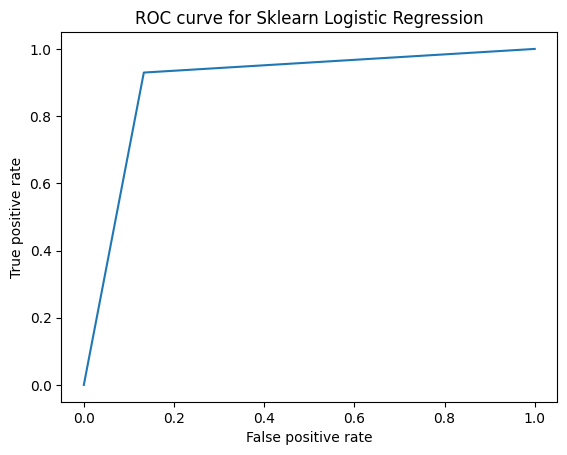

AUC for ROC Sklearn Logistic Regression 0.8982883425224643


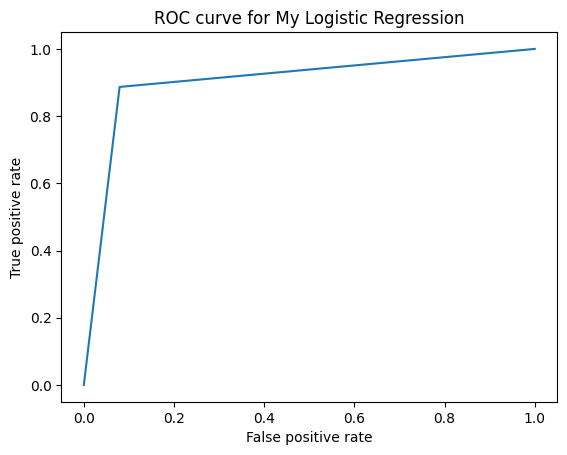

AUC for ROC My Logistic Regression 0.9037839177899138
The performance metrics (accuracy, precision, recall, F1 score) are quite consistent across both approaches. The differences between the manually implemented logistic regression and the sklearn logistic regression are minor, indicating that both models are correctly implemented and comparable in performance.
Both models yield comparable AUC values, indicating that the performance of the manually implemented logistic regression is consistent with that of the sklearn logistic regression model.


In [7]:
'''
(g)
ROC Curve - Logistic Regression Use the logistic regression model from
sklearn and repeat 5-fold cross validation. Then using roc curve package from sklearn.metrics,
plot the ROC curve for each fold and compute the area under the curve. Is this result consistent
with the results you obtained using the logistic regression model you implemented?
'''
from sklearn.linear_model import LogisticRegression as sklr
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import roc_curve, make_scorer, accuracy_score, precision_score, recall_score, f1_score

model = sklr()
model.fit(x_clean_scaled, y_clean_log)
y_test_predicted = model.predict(x_clean_scaled)

# do 5-cross validation from the sklean library on sklearn logistic regression
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}
cr_results = cross_validate(model, x_clean_scaled, y_clean_log, cv=5, scoring=scoring)
print("-------------------------------------------------")
print("Cross validation results for sklearn logistic regression")
print("Accuracy: ", cr_results['test_accuracy'])
print("Precision: ", cr_results['test_precision'])
print("Recall: ", cr_results['test_recall'])
print("F1: ", cr_results['test_f1'])

## printing out the average of the cross validation results
print("Average cross validation results for sklearn logistic regression")
print("Accuracy: ", cr_results['test_accuracy'].mean())
print("Precision: ", cr_results['test_precision'].mean())
print("Recall: ", cr_results['test_recall'].mean())
print("F1: ", cr_results['test_f1'].mean())
print("-------------------------------------------------")
# ROC curve for sklearn logistic regression
fpr, tpr, thresholds = roc_curve(y_clean_log, y_test_predicted)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Sklearn Logistic Regression')
plt.show()

## calculate the AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_clean_log, y_test_predicted)
print("AUC for ROC Sklearn Logistic Regression", auc)


# Roc curve using my logistic regression
y_test_predicted = logistic_model.predict(x_clean_scaled)
fpr, tpr, thresholds = roc_curve(y_clean_log, y_test_predicted)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for My Logistic Regression')
plt.show()

## calculate the AUC
auc = roc_auc_score(y_clean_log, y_test_predicted)
print("AUC for ROC My Logistic Regression", auc)
print("The performance metrics (accuracy, precision, recall, F1 score) are quite consistent across both approaches. The differences between the manually implemented logistic regression and the sklearn logistic regression are minor, indicating that both models are correctly implemented and comparable in performance.")
print("Both models yield comparable AUC values, indicating that the performance of the manually implemented logistic regression is consistent with that of the sklearn logistic regression model.")



In [8]:
'''
(h.1)
Use the trained linear regression model and predict the PT08.S1(CO) value for the test
data.
'''



linear_regress = LinearRegression()
linear_regress.fit(x_clean_scaled, y_clean)

# Adjust the test data to have the same number of features as the training data
# drop the column "Unnamed: 0"
x_test = train_data.drop('Unnamed: 0', axis=1)

x_test_clean = linear_model.clean(x_test)
x_test_clean_scaled = linear_model.scale(x_test)
y_test_predicted = linear_regress.predict(x_test_clean_scaled)
print(y_test_predicted)

# now put it out to a csv file
y_test_predicted = pd.DataFrame(y_test_predicted, columns=['PT08.S1(CO)'])


[ 923.97349534 1170.21015926 1041.3382573  ... 1003.00628071 1012.74023399
 1233.89089376]


In [9]:
'''
(h.2)
use the trained logistic regression model and predict the PT08.S1(CO) binary value (the
same label you created in step d) for the test data
'''
# Use the logistic regression model to predict the test data
logistic_regress = lr.LogisticRegression()
logistic_regress.fit(x_clean_scaled, y_clean_log)
y_test_predicted_log = logistic_regress.predict(x_test_clean_scaled)

## now save both the linear regression and logistic regression predictions in diff columns
y_test_predicted_log = pd.DataFrame(y_test_predicted_log, columns=['PT08.S1(CO)'])
y_test_predicted = pd.concat([y_test_predicted, y_test_predicted_log], axis=1)
y_test_predicted.to_csv('y_test_predicted.csv')
